In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
classes=['Airoplane','Automobile','Bird','cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [5]:
def Display_img(index):
    plt.figure(figsize=(5,2))#Set the size of the image
    plt.matshow(x_train[index])#display the image using matshow
    plt.axis('off')#turn off the axis lables
    plt.title(classes[int(y_train[index])])#display the title

<ipython-input-5-0d66db34c4af>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[index])])#display the title


<Figure size 500x200 with 0 Axes>

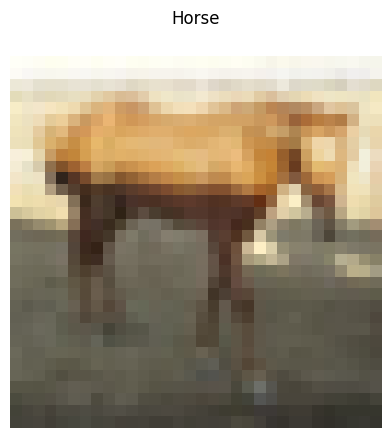

In [6]:
Display_img(2000)

In [7]:
model=Sequential()
model.add(Conv2D(50,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3),activation='relu'))
model.add(Conv2D(150,(3,3),activation='relu'))
model.add(Conv2D(200,(3,3),activation='relu'))
model.add(Conv2D(250,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
training_history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.1114 - loss: 5.8711 - val_accuracy: 0.2709 - val_loss: 2.3070
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.2946 - loss: 2.2202 - val_accuracy: 0.3334 - val_loss: 2.0223
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.3527 - loss: 1.8740 - val_accuracy: 0.3841 - val_loss: 1.7013
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.4119 - loss: 1.6153 - val_accuracy: 0.4820 - val_loss: 1.4474
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.4985 - loss: 1.3885 - val_accuracy: 0.5516 - val_loss: 1.2591
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.5623 - loss: 1.2289 - val_accuracy: 0.5845 - val_loss: 1.1739
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.5969 - loss: 1.1346 - val_accuracy: 0.5912 - val_loss: 1.1655
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.6320 - loss: 1.0423 - val_accura

In [15]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

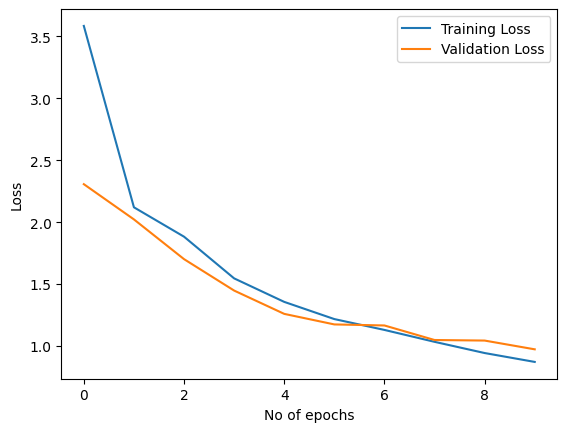

In [16]:
plt.plot(hist['loss'],label="Training Loss")
plt.plot(hist['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.show()

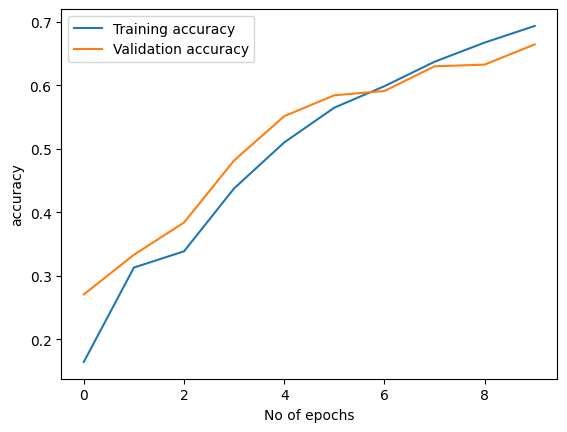

In [17]:

plt.plot(hist['accuracy'],label="Training accuracy")
plt.plot(hist['val_accuracy'],label="Validation accuracy")
plt.legend()
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.show()

In [18]:
def predict(index):
   plt.imshow(x_test[index])#To display the image from the xtest dataset at the specified index
   predict_img=x_test[index].reshape(1,32,32,3)
   predict_prob=model.predict(predict_img)
   predict_class=np.argmax(predict_prob)#provided by the Numpy Library returns the index of the maximum value in the array
   print(f"Predicted class:{classes[predict_class]}")
   print(f"Actual class:{classes[int(y_test[index])]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class:Airoplane
Actual class:Airoplane


<ipython-input-18-846613c5e8c2>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual class:{classes[int(y_test[index])]}")


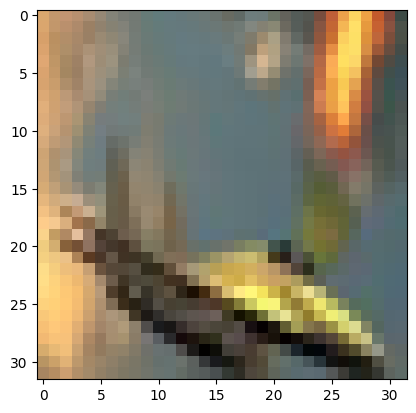

In [22]:
predict(125)